In [1]:
import os
os.chdir("/home/dell/xp_workspace/sign-lang/dynamic_attn")
print(os.getcwd())

/home/dell/xp_workspace/sign-lang/dynamic_attn


In [2]:
import pickle
with open("ablation_analysis/prob_align_v9.pkl", "rb") as f:
    align_probs_v9 = pickle.load(f)
print(len(align_probs_v9))
with open("ablation_analysis/prob_align_v0.pkl", "rb") as f:
    align_probs_v0 = pickle.load(f)
print(len(align_probs_v0))

501
501


In [13]:
f_cnt = 0
t_cnt = 0
total_balnk_v0, total_balnk_v9 = 0, 0


for id, (prob, alignment) in align_probs_v0.items():
    blank_v0, blank_v9 = 0, 0
    for pos in prob:
        if pos == 0:
            blank_v0 += 1
    for pos in align_probs_v9[id][0]:
        if pos == 0:
            blank_v9 += 1
            
    if sum(prob) > sum(align_probs_v9[id][0]):
        t_cnt += 1
    else:
        if blank_v9 < blank_v0 and blank_v0 - blank_v9 >= 4:
            print(blank_v0 - blank_v9, len(prob))
            print("blank_v9 < blank_v0, and v9_prob > vo_prob: ", id)
        f_cnt += 1
    total_balnk_v0 += blank_v0
    total_balnk_v9 += blank_v9
    
print(t_cnt, f_cnt)
print(total_balnk_v0, total_balnk_v9)

4 33
blank_v9 < blank_v0, and v9_prob > vo_prob:  01April_2010_Thursday_tagesschau_default-5
4 43
blank_v9 < blank_v0, and v9_prob > vo_prob:  01December_2011_Thursday_heute_default-8
7 48
blank_v9 < blank_v0, and v9_prob > vo_prob:  01December_2011_Thursday_heute_default-9
6 51
blank_v9 < blank_v0, and v9_prob > vo_prob:  01February_2011_Tuesday_tagesschau_default-7
4 53
blank_v9 < blank_v0, and v9_prob > vo_prob:  01July_2010_Thursday_tagesschau_default-10
6 40
blank_v9 < blank_v0, and v9_prob > vo_prob:  01June_2010_Tuesday_heute_default-10
4 48
blank_v9 < blank_v0, and v9_prob > vo_prob:  01June_2010_Tuesday_tagesschau_default-6
4 34
blank_v9 < blank_v0, and v9_prob > vo_prob:  01June_2011_Wednesday_tagesschau_default-13
4 56
blank_v9 < blank_v0, and v9_prob > vo_prob:  01May_2010_Saturday_tagesschau_default-2
4 28
blank_v9 < blank_v0, and v9_prob > vo_prob:  01May_2010_Saturday_tagesschau_default-3
4 33
blank_v9 < blank_v0, and v9_prob > vo_prob:  01May_2010_Saturday_tagesschau_de

In [4]:
from src.data.vocabulary import Vocabulary
import pandas as pd
corpus = pd.read_csv("Data/slr-phoenix14/train.corpus.csv", sep='|')
videonames = corpus['folder'].values
annotation = corpus['annotation'].values
ids = corpus['id'].values
video_annotation = {}
for i in range(len(ids)):
    video_annotation[ids[i]] = annotation[i]

In [6]:
gloss = video_annotation["02November_2010_Tuesday_tagesschau_default-0"]
gloss

'__ON__ JETZT WETTER WIE-AUSSEHEN MORGEN MITTWOCH DRITTE NOVEMBER __OFF__'

In [7]:
vocab = Vocabulary("Data/slr-phoenix14/newtrainingClasses.txt")
gloss_ids = []
for g in gloss.strip().split():
    gloss_ids.append(vocab.word2index[g])
gloss_ids

[1140, 451, 1062, 1065, 574, 566, 208, 695, 1139]

In [8]:
gloss = video_annotation["02November_2010_Tuesday_tagesschau_default-0"]
vocab = Vocabulary("Data/slr-phoenix14/newtrainingClasses.txt")
gloss_ids = []
for g in gloss.strip().split():
    gloss_ids.append(vocab.word2index[g])
print(gloss_ids)
v9_probs, v9_align = align_probs_v9["02November_2010_Tuesday_tagesschau_default-0"]
v0_probs, v0_align = align_probs_v0["02November_2010_Tuesday_tagesschau_default-0"]
print(v9_align)
print(v0_align)

[1140, 451, 1062, 1065, 574, 566, 208, 695, 1139]
[1140  451  451 1062 1062 1236 1065 1065 1236  574 1236 1236  566  566
 1236  208  208 1236  695  695  695 1139]
[1140  451  451 1236 1062 1236 1065 1236 1236  574 1236 1236  566 1236
 1236 1236  208 1236 1236  695  695 1139]


/home/dell/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:1867: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


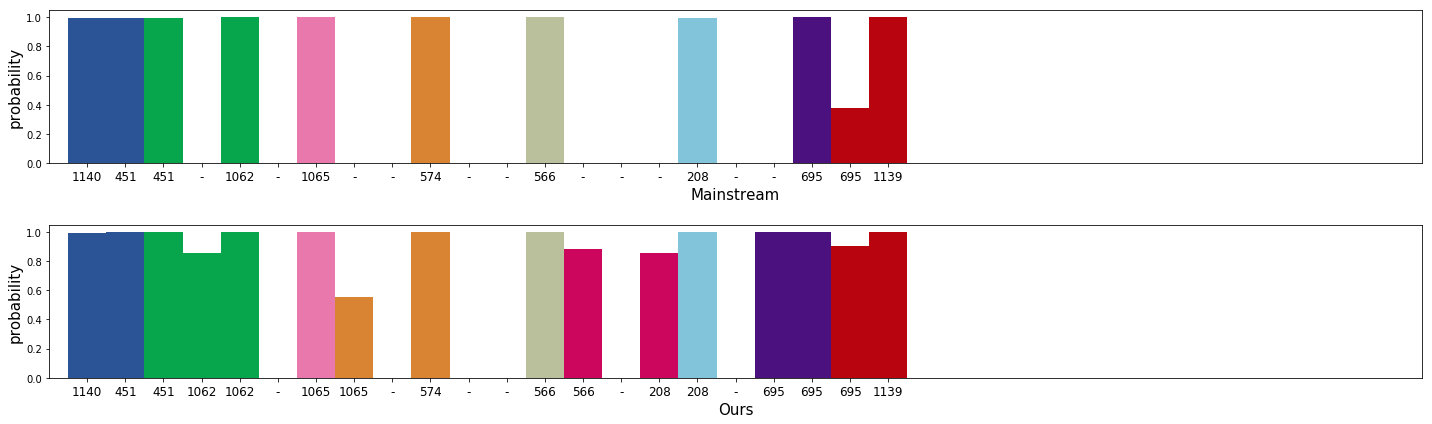

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

fig, (ax1, ax2) = plt.subplots(2)
plt.rcParams["figure.figsize"] = (20,6)


palette1 = ['#2a5495', '#2a5495', '#07a64c', '#07a64c', '#07a64c', 
           '#e979ad', '#e979ad', '#d88432', '#d88432', '#d88432', 
           '#b9c09b', '#b9c09b', '#b9c09b', '#cd065d', '#cd065d',
           '#cd065d', '#82c5db', '#b9c09b', '#4b117f', '#4b117f',
           '#b7040e', '#b7040e', '#2a5495', '#2a5495', '#2a5495',
           '#82c5db', '#82c5db', '#b9c09b', '#cd065d', '#07a64d',
           '#07a64d', '#e979ad', '#e979ad', '#cd065d', '#4b117f']

palette2 = ['#2a5495', '#2a5495', '#07a64c', '#07a64c', '#07a64c', 
           '#e979ad', '#e979ad', '#d88432', '#d88432', '#d88432', 
           '#b9c09b', '#b9c09b', '#b9c09b', '#cd065d', '#cd065d',
           '#cd065d', '#82c5db', '#b9c09b', '#4b117f', '#4b117f',
           '#b7040e', '#b7040e', '#b7040e', '#2a5495', '#2a5495',
           '#b7040e', '#82c5db', '#b9c09b', '#cd065d', '#cd065d',
           '#07a64d', '#07a64d', '#e979ad', '#cd065d', '#4b117f']

x = list(range(len(v0_probs)))

y1 = v0_probs

width = 1.0
lefts = [x * width for x, _ in enumerate(y1)]

labels_1 = [id  if id != 1236 else "-" for id in v0_align]

ax1.bar(left = lefts, height = y1, width = width,  tick_label = labels_1, color = palette1)
ax1.axis(ymin = 0, ymax = 1.05, xmin = -1.0, xmax = 35)
ax1.tick_params(axis='x', which='major', labelsize=8)
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=0, fontsize=12)
ax1.set_ylabel('probability', fontsize=15)
# ax2.grid(True, axis="x", linewidth=1, ls='--')
ax1.set_xlabel('Mainstream', fontsize=15)
plt.rcParams['axes.titlesize'] = 10

y2 = v9_probs
labels_2 = [id  if id != 1236 else "-" for id in v9_align]
# labels_2 = list(range(1, 36))
ax2.bar(left = lefts, height = y2, width = width,  tick_label = labels_2, color = palette2)
ax2.axis(ymin = 0, ymax = 1.05, xmin = -1.0, xmax = 35)
ax2.tick_params(axis='x', which='major', labelsize=8)
ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=0, fontsize=12)
# ax1.grid(True, axis="x", linewidth=1, ls='--')
ax2.set_ylabel('probability', fontsize=15)
ax2.set_xlabel('Ours', fontsize=15)
# ax1.set_title('ours')



fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace=0, hspace=0.4)#调整子图间距
plt.savefig("ablation_analysis/confidence.png")
plt.show()


In [14]:
!ls ablation_analysis

alignment.py		   confidence.png  prob_align_v0.pkl  similarity.py
binomial_distribution..py  confidence.py   prob_align_v9.pkl
confidence_analysis.ipynb  __init__.py	   __pycache__


In [15]:
labels = [id  if id != 1236 else "-" for id in v9_align]

In [16]:
print(labels)

[1140, 451, 451, 1062, 1062, '-', 1065, 1065, '-', 574, '-', '-', 566, 566, '-', 208, 208, '-', 695, 695, 695, 1139]
